In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import *
from feature_layer_utils import *
import pandas as pd
from arcgis.geoenrichment import *
from arcgis.features.enrich_data import enrich_layer

In [2]:

#gis = GIS(username='izaslavsky_ucsd')  # this will ask for password. 
print("Enter the Client ID/APP ID generated from Arc GIS:")
app_id = input()
gis = GIS("https://ucsdonline.maps.arcgis.com/home", client_id=app_id)
arcgis.__version__
# Elm5V3upnnV17Q3r

Enter the Client ID/APP ID generated from Arc GIS:


 Elm5V3upnnV17Q3r


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=Elm5V3upnnV17Q3r&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=x7rkjq32uCb4bb3EpvM66eoEMPutZO&allow_verification=false


Enter code obtained on signing in using SAML:  ········


/Users/amolkale/Documents/DSE/DSE260-Capstone-Project/capstone/venv3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ucsdonline.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


'2.1.0'

In [3]:
# This is the name of the feature layer we had created as a pre-requisite for covering 
# neighborhoods from San Diego County
sd_county_areas_county_content_name = 'CommunityPlanningAreasSDCounty'

In [4]:
# Searching for the Feature Layer Collection
sd_county_areas_county_content_list = gis.content.search(sd_county_areas_county_content_name)

In [5]:
sd_county_areas_county_content_list

[<Item title:"CommunityPlanningAreasSDCounty" type:Feature Layer Collection owner:akale_UCSDOnline>,
 <Item title:"CommunityPlanningAreasSDCounty" type:Shapefile owner:akale_UCSDOnline>]

In [6]:
# There is a layer present with this name as the first element in the list, so let's extract it from the list
sd_county_areas_fl = sd_county_areas_county_content_list[0]

<Item title:"CommunityPlanningAreasSDCounty" type:Feature Layer Collection owner:akale_UCSDOnline>
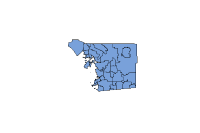

In [7]:
sd_county_areas_fl

In [8]:
%%time
# Creating feature set using query on first element which is the feature layer, second element being the shape file
feature_set = sd_county_areas_fl.layers[0].query()

CPU times: user 134 ms, sys: 28.9 ms, total: 163 ms
Wall time: 1.81 s


In [9]:
# Explore the feature-set dataframe
sd_county_areas_fl_sdf = feature_set.sdf
sd_county_areas_fl_sdf.head(2)

,FID,OBJECTID,AREA_,PERIMETER,CPASG_LABE,CPANAME,SPONSORNAM,CPASG,SUBREGPLAN,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,3259688344.0,339691.622436,Borrego Springs,Desert,BORREGO SPRINGS,190401,Desert Subregional Plan Area,3259688343.29593,339691.623046,434365912.613281,123995.732988,"{""rings"": [[[-12958569.3039048, 3925457.047805..."
1,2,2,1454254222.06,180042.918231,Julian,Julian,,192200,,1454254222.26481,180042.918084,192965715.507813,65610.700218,"{""rings"": [[[-12973903.3079023, 3905884.074290..."


In [10]:
# Let's check if the San Diego City Layer has same number of columns
sd_city_areas_content_list = gis.content.search('CommunityPlanningAreasSDCity')

In [11]:
sd_city_areas_content_list

[<Item title:"CommunityPlanningAreasSDCity" type:Feature Layer Collection owner:akale_UCSDOnline>,
 <Item title:"CommunityPlanningAreasSDCity" type:Shapefile owner:akale_UCSDOnline>]

In [12]:
sd_city_areas_content_flc = sd_city_areas_content_list[0]

<Item title:"CommunityPlanningAreasSDCity" type:Feature Layer Collection owner:akale_UCSDOnline>
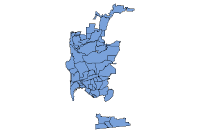

In [13]:
sd_city_areas_content_flc

In [14]:
sd_city_areas_content_fl = sd_city_areas_content_flc.layers[0]

In [15]:
sd_city_areas_content_fl

<FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/CommunityPlanningAreasSDCity/FeatureServer/0">

In [16]:
%%time
sd_city_areas_fl_sdf = sd_city_areas_content_fl.query().sdf
sd_city_areas_fl_sdf.head(2)

CPU times: user 254 ms, sys: 18.4 ms, total: 272 ms
Wall time: 2.7 s


,FID,OBJECTID,CPCODE,CPNAME,ACREAGE,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,37,"SOUTHEASTERN SAN DIEGO,SOUTHEASTERN",3049.665754,132842908.899,51202.267742,132842908.883943,51202.267742,17477623.855469,18565.577657,"{""rings"": [[[-13035836.4422912, 3857951.557089..."
1,2,2,97,MILITARY FACILITIES,444.218254,19350069.7695,31304.013099,19350069.762598,31304.013099,2544856.328125,11343.480057,"{""rings"": [[[-13038426.5095588, 3854603.291244..."


In [17]:
# Check non-common columns between the two sdef so that they are consistent while concatinating
non_common_columns = find_non_common_columns(sd_county_areas_fl_sdf,sd_city_areas_fl_sdf)

Common columns between two layers: 
{'OBJECTID', 'FID', 'Shape__Length', 'ShapeSTAre', 'Shape__Area', 'SHAPE', 'ShapeSTLen'}
Non-common columns between two layers: 
{'CPANAME', 'CPNAME', 'SPONSORNAM', 'SUBREGPLAN', 'CPCODE', 'CPASG_LABE', 'ACREAGE', 'Shape_STAr', 'AREA_', 'Shape_STLe', 'CPASG', 'PERIMETER'}


In [18]:
# I know that CPNAME from city and CPANAME from county are equivalent,
# so let's update rename that column for one of them.
# CPANAME makes more sense as in "Community Planned Area Name". 
# So let's rename the column name for spatial dataframe from SD City Layer.
sd_city_areas_fl_sdf.rename(columns={"CPNAME": "CPANAME"},inplace=True)

In [19]:
sd_city_areas_fl_sdf.columns

Index(['FID', 'OBJECTID', 'CPCODE', 'CPANAME', 'ACREAGE', 'Shape_STAr',
       'Shape_STLe', 'ShapeSTAre', 'ShapeSTLen', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [20]:
# Check non-common columns again to see if CPNAME is gone from it now
non_common_columns = find_non_common_columns(sd_county_areas_fl_sdf,sd_city_areas_fl_sdf)

Common columns between two layers: 
{'OBJECTID', 'FID', 'Shape__Length', 'ShapeSTAre', 'CPANAME', 'Shape__Area', 'SHAPE', 'ShapeSTLen'}
Non-common columns between two layers: 
{'ACREAGE', 'Shape_STAr', 'AREA_', 'SPONSORNAM', 'SUBREGPLAN', 'CPASG', 'CPCODE', 'Shape_STLe', 'CPASG_LABE', 'PERIMETER'}


In [21]:
# Now that we are done with column name changes, 
# let's drop these uncommon columns from both dataframes to keep the dataframes consistent.

# Since we care about Area name mostly for these spatial features i.e. CPANAME

sd_city_areas_fl_sdf.drop(columns=non_common_columns, inplace=True, errors='ignore')
sd_county_areas_fl_sdf.drop(columns=non_common_columns, inplace=True, errors='ignore')

In [22]:
# Let's check if there is no non-common column now
non_common_columns = find_non_common_columns(sd_county_areas_fl_sdf,sd_city_areas_fl_sdf)

Common columns between two layers: 
{'OBJECTID', 'FID', 'Shape__Length', 'ShapeSTAre', 'CPANAME', 'Shape__Area', 'SHAPE', 'ShapeSTLen'}
Non-common columns between two layers: 
set()


In [23]:
# Now that there are no non-common columns. Lets print the spatial dataframes again now
print("City:")
display(sd_city_areas_fl_sdf.head(2))
print("County:")
display(sd_county_areas_fl_sdf.head(2))

City:


,FID,OBJECTID,CPANAME,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,"SOUTHEASTERN SAN DIEGO,SOUTHEASTERN",132842908.883943,51202.267742,17477623.855469,18565.577657,"{""rings"": [[[-13035836.4422912, 3857951.557089..."
1,2,2,MILITARY FACILITIES,19350069.762598,31304.013099,2544856.328125,11343.480057,"{""rings"": [[[-13038426.5095588, 3854603.291244..."


County:


,FID,OBJECTID,CPANAME,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,Desert,3259688343.29593,339691.623046,434365912.613281,123995.732988,"{""rings"": [[[-12958569.3039048, 3925457.047805..."
1,2,2,Julian,1454254222.26481,180042.918084,192965715.507813,65610.700218,"{""rings"": [[[-12973903.3079023, 3905884.074290..."


In [24]:
# Let's union these spatial dataframes to later create a layer out of it.
final_sedf = pd.concat([sd_city_areas_fl_sdf,sd_county_areas_fl_sdf])
final_sedf.head(2)

,FID,OBJECTID,CPANAME,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,"SOUTHEASTERN SAN DIEGO,SOUTHEASTERN",132842908.883943,51202.267742,17477623.855469,18565.577657,"{""rings"": [[[-13035836.4422912, 3857951.557089..."
1,2,2,MILITARY FACILITIES,19350069.762598,31304.013099,2544856.328125,11343.480057,"{""rings"": [[[-13038426.5095588, 3854603.291244..."


In [25]:
print(f"Shape of concatinated SEDF: {final_sedf.shape}")

Shape of concatinated SEDF: (143, 8)


In [26]:
if sd_city_areas_fl_sdf.shape[0] + sd_county_areas_fl_sdf.shape[0] != final_sedf.shape[0]:
    raise AssertionError("The concatenated SEDF is missing rows or having additional ones.")

In [27]:
%%time
# Convert back from a SEDF into a feature layer, and publishing on AGOL
my_new_featurelayer = final_sedf.spatial.to_featurelayer(title="San Diego Community Planned Areas", 
                                                         gis=gis, 
                                                         folder='nourish_gis',
                                                         tags=['SanDiegoNeighborhoods','SanDiegoCommunityPlannedAreas'])


CPU times: user 620 ms, sys: 60.6 ms, total: 681 ms
Wall time: 15.3 s


In [28]:
# Get consumer spending geo-enrichment variables.
consumer_spending_variables = get_enrichment_variables('consumer_spending')

Parsing [Esri Consumer Spending Data ] for consumer_spending segment!!
	Number of Variables: 360


In [29]:
# Get consumer spending geo-enrichment variables.
demographics_variables = get_enrichment_variables('demographics')

Parsing [Esri Demographics] for demographics segment!!
	Number of Variables: 1923


In [30]:
# For now let's just enrich consumer spending and later come back for demographics
final_enriched_df = enrich(study_areas=final_sedf, analysis_variables=consumer_spending_variables)

In [31]:
print(f"Shape of San Diego Community Planned areas sedf: {final_sedf.shape}")
print(f"Shape of final_enriched_df: {final_enriched_df.shape}")


Shape of San Diego Community Planned areas sedf: (143, 8)
Shape of final_enriched_df: (143, 366)


In [32]:
final_enriched_df.head(3)

,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,x9036_x,x9036fy_x,x1131_x,x1132_x,x1133_x,...,x15001fy_x,x7017_x,x7018_x,x7019_x,x7020_x,x7017fy_x,x7018fy_x,x7019fy_x,x7020fy_x,SHAPE
0,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,2453212.0,2904627.0,41578643.0,12724787.0,6901501.0,...,277169568.0,5872877.0,898952.0,756978.0,4216946.0,6954589.0,1064589.0,896503.0,4993498.0,"{""rings"": [[[-13035836.4422912, 3857951.557089..."
1,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,132064.0,158218.0,2406915.0,772975.0,445996.0,...,15296968.0,348937.0,52985.0,40574.0,255378.0,418037.0,63478.0,48609.0,305951.0,"{""rings"": [[[-13038426.5095588, 3854603.291244..."
2,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,3896742.0,4639915.0,60771338.0,18991059.0,10051630.0,...,434817711.0,9473739.0,1409992.0,1171363.0,6892384.0,11281584.0,1678867.0,1394689.0,8208028.0,"{""rings"": [[[-13037099.6630002, 3843048.861360..."


In [35]:
my_new_featurelayer

<Item title:"San Diego Community Planned Areas" type:Feature Layer Collection owner:akale_UCSDOnline>

In [36]:
%%time
# Clearly when we do enrichment on memory for the polygons from sd community planned areas spatial fataframe,
# we are losing the original columns.
# So let's enrich the layer and create a new one directly.

sd_city_comm_planned_areas_enriched = enrich_layer(my_new_featurelayer,
                             analysis_variables=consumer_spending_variables,
                             country='US', 
                             output_name='San Diego Neighbourhood Consumer Spending')

{"cost": -1}


CPU times: user 557 ms, sys: 78.9 ms, total: 635 ms
Wall time: 51.7 s


In [37]:
sd_city_comm_planned_areas_enriched

<Item title:"San_Diego_Neighbourhood_Consumer_Spending" type:Feature Layer Collection owner:akale_UCSDOnline>